In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [2]:
submissions = []
for submission in os.listdir('../submissions/'):
    model_type = submission.split('_')[0]
    if model_type not in ("rank", "ridge", "logisticstack"):
        submissions.append(submission)
n_test = len(pd.read_csv("../input/test.csv", usecols=["ID_code"]))
n_submissions = len(submissions)
test_data = np.zeros((n_test, n_submissions))

In [3]:
column_names = []

In [4]:
for i, submission in enumerate(submissions):
    column_names.append(submission.split('.csv')[0])
    test_data[:,i] = pd.read_csv("../submissions/{}".format(submission), 
                               usecols=["target"]).values[:,0]

In [5]:
column_names

['catboost_baseline_0.8990016434009047',
 'lgb_baseline_0.9005332611628906',
 'lgb_cat_0.8996122239456474',
 'lgb_correctupsample_0.9013018483668223',
 'lgb_shuffle_0.8989790622496775',
 'lgb_optimal_0.9012421958055051',
 'gp_baseline_0.7521955969794101',
 'sklearn_gbc_0.8922023129013112',
 'nn_baseline_0.8976530055368465',
 'nn_baseline_0.8978658129600151',
 'xgboost_optimal_0.8991092426722407',
 'naivebayes_baseline_0.888472439455181',
 'lgb_target_0.8996070069324981',
 'gp_baseline_0.899424617243236',
 'gp_baseline_0.7392298244211971',
 'lgb_correctupsample_0.9012404107976661',
 'lgb_cat_0.8995490019218002',
 'sklearn_gbc_0.8909886107328682',
 'sklearn_gbc_0.8317933322481975',
 'gmm_baseline_0.9007491411836093',
 'lgb_optimal_0.9013692237006661',
 'lgb_baseline_0.900441466291221']

In [6]:
test_df = pd.DataFrame(data=test_data, columns=column_names)

In [7]:
test_df.head()

,catboost_baseline_0.8990016434009047,lgb_baseline_0.9005332611628906,lgb_cat_0.8996122239456474,lgb_correctupsample_0.9013018483668223,lgb_shuffle_0.8989790622496775,lgb_optimal_0.9012421958055051,gp_baseline_0.7521955969794101,sklearn_gbc_0.8922023129013112,nn_baseline_0.8976530055368465,nn_baseline_0.8978658129600151,...,lgb_target_0.8996070069324981,gp_baseline_0.899424617243236,gp_baseline_0.7392298244211971,lgb_correctupsample_0.9012404107976661,lgb_cat_0.8995490019218002,sklearn_gbc_0.8909886107328682,sklearn_gbc_0.8317933322481975,gmm_baseline_0.9007491411836093,lgb_optimal_0.9013692237006661,lgb_baseline_0.900441466291221
0,0.075034,0.090361,0.079608,0.496273,0.101279,0.478158,0.067971,0.106306,0.125565,0.124682,...,0.079592,0.091317,0.079712,0.454537,0.078052,0.113581,0.119494,0.100020,0.477733,0.100215
1,0.197923,0.225661,0.217654,0.707960,0.213279,0.689659,0.052549,0.250081,0.172367,0.157227,...,0.216586,0.162568,0.095090,0.693010,0.219016,0.266923,0.166531,0.141077,0.690618,0.221458
2,0.204482,0.178853,0.190226,0.658079,0.159604,0.633248,0.144975,0.205224,0.220634,0.206067,...,0.189182,0.214018,0.108181,0.670452,0.193777,0.198207,0.147831,0.117139,0.639722,0.178375
3,0.173766,0.209107,0.203290,0.649494,0.162530,0.657873,0.136122,0.188798,0.121060,0.142057,...,0.198135,0.198931,0.109742,0.657830,0.198045,0.176124,0.066363,0.156429,0.647539,0.203950
4,0.036149,0.046328,0.046489,0.278981,0.054701,0.255356,0.073798,0.044284,0.019759,0.026241,...,0.046012,0.039520,0.058260,0.257463,0.047106,0.047920,0.065447,0.030869,0.252872,0.045523


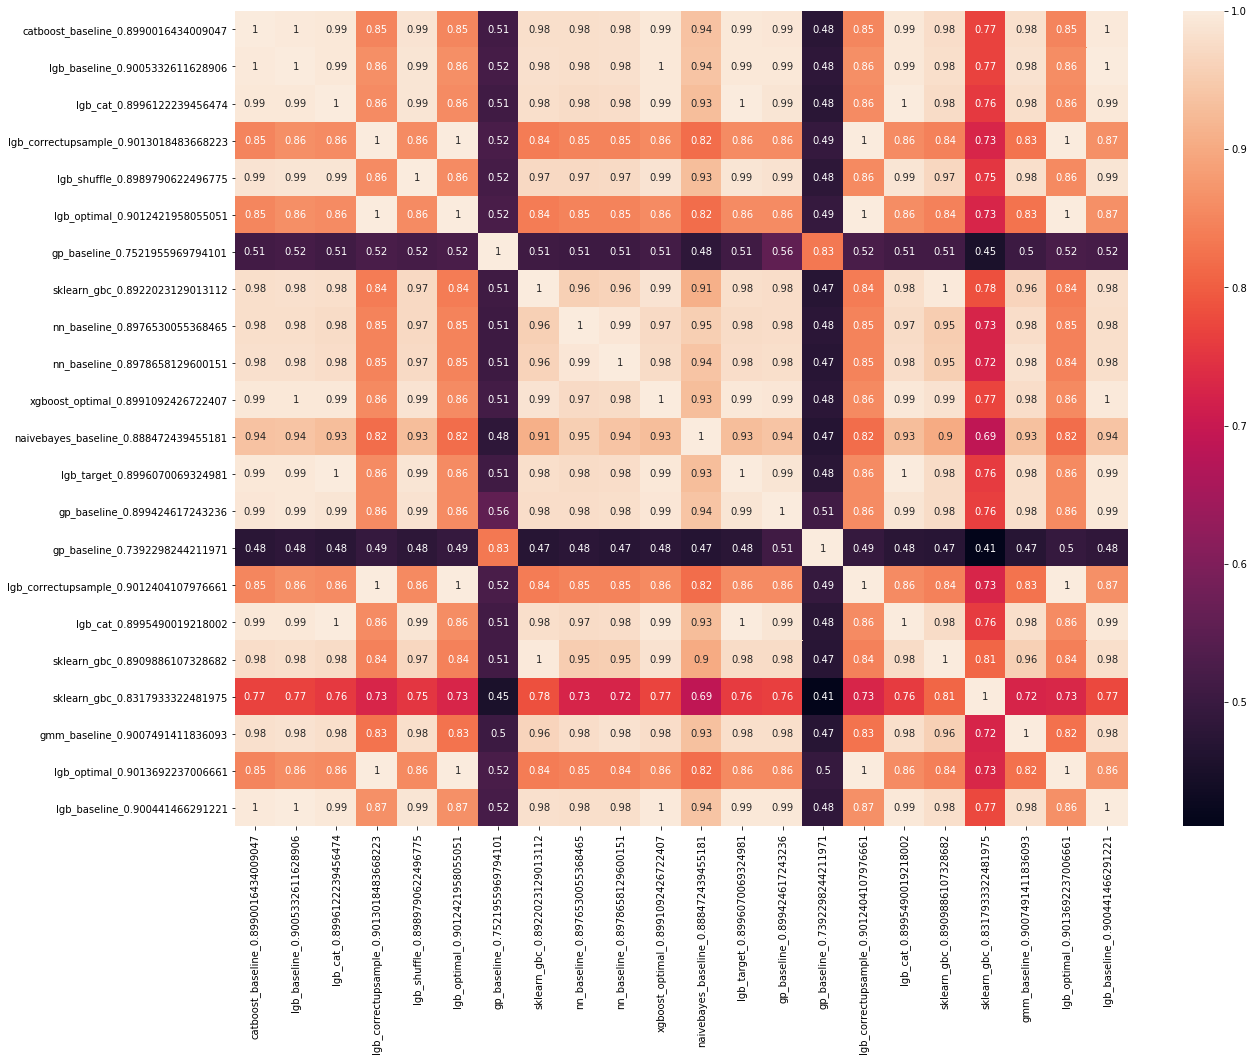

In [8]:
corr = test_df.corr()
fig, ax = plt.subplots(figsize=(20,15)) 

sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        annot=True,
           ax=ax)